In [486]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import pickle

# DATA WRANGLING

In [487]:
def load_data(train_path, validation_path):
    df_train = pd.read_csv(train_path)
    df_validation = pd.read_csv(validation_path)

    return df_train, df_validation

In [488]:
df_train, df_validation = load_data("housing_price_prediction/train.csv", "housing_price_prediction/validation.csv")

In [489]:
df_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,9800,4,2,2,yes,yes,no,no,no,2,no,semi-furnished,5250000
1,6540,4,2,2,yes,yes,yes,no,yes,2,yes,furnished,8540000
2,3520,2,1,2,yes,no,no,no,no,0,yes,furnished,4515000
3,8250,3,1,1,yes,no,no,no,no,0,no,furnished,4480000
4,3180,4,1,2,yes,no,yes,no,yes,0,no,unfurnished,3290000


In [490]:
df_validation.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,3480,4,1,2,no,no,no,no,no,1,no,semi-furnished,3290000
1,2015,3,1,2,yes,no,yes,no,no,0,yes,semi-furnished,3850000
2,5400,3,1,1,yes,no,no,no,no,3,no,semi-furnished,4025000
3,6000,3,2,4,yes,yes,no,no,yes,1,no,furnished,7210000
4,2910,3,1,1,no,no,no,no,no,0,no,furnished,1750000


In [491]:
df_train.shape

(381, 13)

In [492]:
df_validation.shape

(82, 13)

In [493]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              381 non-null    int64 
 1   bedrooms          381 non-null    int64 
 2   bathrooms         381 non-null    int64 
 3   stories           381 non-null    int64 
 4   mainroad          381 non-null    object
 5   guestroom         381 non-null    object
 6   basement          381 non-null    object
 7   hotwaterheating   381 non-null    object
 8   airconditioning   381 non-null    object
 9   parking           381 non-null    int64 
 10  prefarea          381 non-null    object
 11  furnishingstatus  381 non-null    object
 12  price             381 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 38.8+ KB


In [494]:
df_validation.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              82 non-null     int64 
 1   bedrooms          82 non-null     int64 
 2   bathrooms         82 non-null     int64 
 3   stories           82 non-null     int64 
 4   mainroad          82 non-null     object
 5   guestroom         82 non-null     object
 6   basement          82 non-null     object
 7   hotwaterheating   82 non-null     object
 8   airconditioning   82 non-null     object
 9   parking           82 non-null     int64 
 10  prefarea          82 non-null     object
 11  furnishingstatus  82 non-null     object
 12  price             82 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 8.5+ KB


In [495]:
print(f"Train:\n{df_train.isnull().sum()}\n\nValidation:\n{df_validation.isnull().sum()}")

Train:
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64

Validation:
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64


In [496]:
print(f"Train:\n{df_train.duplicated().sum()}\n\nValidation:\n{df_validation.duplicated().sum()}")

Train:
0

Validation:
0


In [497]:
# Using label encoding
list_to_encode = [name for name in df_train.columns if df_train[name].dtype == 'object']
label_encoder = LabelEncoder()
for name in list_to_encode:
    df_train[name] = label_encoder.fit_transform(df_train[name])
    df_validation[name] = label_encoder.fit_transform(df_validation[name])

In [498]:
df_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,9800,4,2,2,1,1,0,0,0,2,0,1,5250000
1,6540,4,2,2,1,1,1,0,1,2,1,0,8540000
2,3520,2,1,2,1,0,0,0,0,0,1,0,4515000
3,8250,3,1,1,1,0,0,0,0,0,0,0,4480000
4,3180,4,1,2,1,0,1,0,1,0,0,2,3290000


In [499]:
df_validation.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,3480,4,1,2,0,0,0,0,0,1,0,1,3290000
1,2015,3,1,2,1,0,1,0,0,0,1,1,3850000
2,5400,3,1,1,1,0,0,0,0,3,0,1,4025000
3,6000,3,2,4,1,1,0,0,1,1,0,0,7210000
4,2910,3,1,1,0,0,0,0,0,0,0,0,1750000


In [500]:
# Saving label encoded dataframe
df_train.to_csv("housing_price_prediction/df_train_enc.csv", index = False)
df_validation.to_csv("housing_price_prediction/df_validation_enc.csv", index = False)

From observations of data wrangling we can see that, there are no null values in the features nor any duplicates. 

# EDA

Visualization 

In [501]:
# Function for Histplot
def hist_plot(df, data):
    print(f"Histplots for {data} data:\n")
    
    for i in df.columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(df[i], kde = True)
        plt.title(f"Histogram of {i}")
        plt.xlabel(i)
        plt.ylabel("Count")
        plt.show()

In [502]:
# hist_plot(df_train, 'train')

In [503]:
# hist_plot(df_validation, 'validation')

The feature "hotwaterheating" is heavily imbalanced in training set and only single category of the feature (0) is present in validation set. So, dropping the feature would be more effective.

In [504]:
df_train = df_train.drop("hotwaterheating", axis = 1)
df_validation = df_validation.drop("hotwaterheating", axis =1)

In [505]:
# Before transformation
df_train.skew()

area                1.216402
bedrooms            0.476728
bathrooms           1.355009
stories             1.045806
mainroad           -2.192918
guestroom           1.783265
basement            0.684897
airconditioning     0.826350
parking             0.893788
prefarea            1.372481
furnishingstatus   -0.120938
price               1.157101
dtype: float64

In [506]:
df_validation.skew()

area                1.387758
bedrooms            0.562634
bathrooms           1.915967
stories             1.142704
mainroad           -1.671013
guestroom           1.215060
basement            0.405345
airconditioning     0.928365
parking             1.014244
prefarea            1.138531
furnishingstatus   -0.098624
price               1.001265
dtype: float64

In [507]:
# df_train['area'] = np.log1p(df_train['area'])
# df_train['price'] = np.log1p(df_train['price'])

# df_validation['area'] = np.log1p(df_validation['area'])
# df_validation['price'] = np.log1p(df_validation['price'])

In [508]:
df_train.skew()

area                1.216402
bedrooms            0.476728
bathrooms           1.355009
stories             1.045806
mainroad           -2.192918
guestroom           1.783265
basement            0.684897
airconditioning     0.826350
parking             0.893788
prefarea            1.372481
furnishingstatus   -0.120938
price               1.157101
dtype: float64

In [509]:
df_validation.skew()

area                1.387758
bedrooms            0.562634
bathrooms           1.915967
stories             1.142704
mainroad           -1.671013
guestroom           1.215060
basement            0.405345
airconditioning     0.928365
parking             1.014244
prefarea            1.138531
furnishingstatus   -0.098624
price               1.001265
dtype: float64

In [510]:
# Scaling Area
scaler = StandardScaler()
df_train['area'] = scaler.fit_transform(df_train[['area']])
df_validation['area'] = scaler.fit_transform(df_validation[['area']])

In [511]:
df_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus,price
0,2.319101,4,2,2,1,1,0,0,2,0,1,5250000
1,0.722635,4,2,2,1,1,1,1,2,1,0,8540000
2,-0.756300,2,1,2,1,0,0,0,0,1,0,4515000
3,1.560045,3,1,1,1,0,0,0,0,0,0,4480000
4,-0.922803,4,1,2,1,0,1,1,0,0,2,3290000


In [512]:
df_validation.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus,price
0,-0.760463,4,1,2,0,0,0,0,1,0,1,3290000
1,-1.297982,3,1,2,1,0,1,0,0,1,1,3850000
2,-0.056002,3,1,1,1,0,0,0,3,0,1,4025000
3,0.164142,3,2,4,1,1,0,1,1,0,0,7210000
4,-0.969600,3,1,1,0,0,0,0,0,0,0,1750000


In [513]:
# Heat Map
def heatmap_all(df, data):
    print(f"Heatmap for {data} data:\n")
    
    plt.figure(figsize = (12, 8))
    sns.heatmap(df.corr(), annot = True)
    plt.show()

Heatmap for train data:



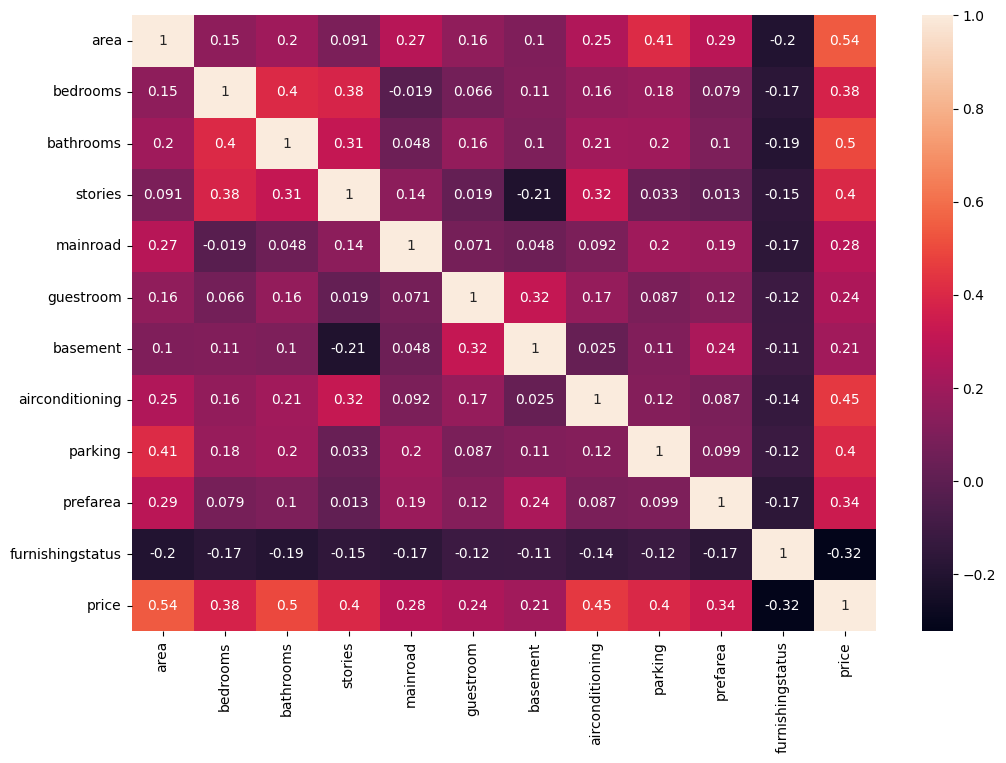

In [514]:
heatmap_all(df_train, "train")

Heatmap for validation data:



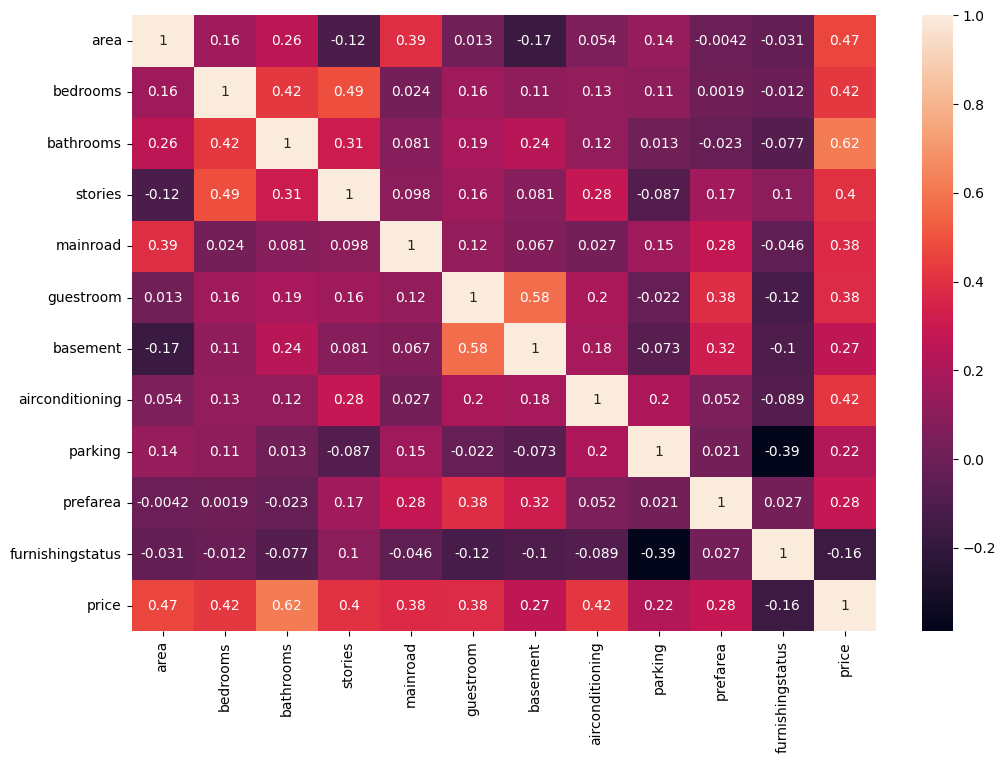

In [515]:
heatmap_all(df_validation, "validation")

In [516]:
# Input features and target feature
def split_data(df_train, df_validation):
    X_train = df_train.drop("price", axis = 1)
    y_train = df_train['price']

    X_valid = df_validation.drop('price', axis =1)
    y_valid = df_validation['price']

    return X_train, y_train, X_valid, y_valid

In [517]:
X_train, y_train, X_valid, y_valid = split_data(df_train, df_validation)

In [518]:
# Using random forest regressor 
r2_list = []

# Checking for optimal random state
# for i in range(0, 100):
#     model = RandomForestRegressor(n_estimators=50, random_state=i)

#     # Fitting 
#     model.fit(X_train, y_train)

#     # Predicting
#     y_pred = model.predict(X_valid)

#     # print("Using Random Forest Regressor:")
#     r2_list.append(r2_score(y_valid, y_pred))

print(r2_list)
    # print(f"R2 Score: {r2_score(y_valid, y_pred)} at i = {i}")

[]


In [519]:
# max_ = max(r2_list)

# print(f"Max R2 Score: {max_}")
# print(f"Index of max: {r2_list.index(max_)}")

In [520]:
# Using random forest regressor 
rf_model = RandomForestRegressor(n_estimators=50, random_state=66)

# Fitting 
rf_model.fit(X_train, y_train)

# Predicting
y_pred = rf_model.predict(X_valid)

print("Using Random Forest Regressor:")
# Evaluation
print(f"R2 Score: {r2_score(y_valid, y_pred)}")

Using Random Forest Regressor:
R2 Score: 0.6752857632092915


In [521]:
# Saving model as pickle file
with open('Saved_Models/rf_model_66.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("Model saved as pickle file.")

Model saved as pickle file.


In [522]:
# Using Linear Regression 

lr_model = LinearRegression()

# Fitting
lr_model.fit(X_train, y_train)

# Prediciting
y_pred = lr_model.predict(X_valid)

# Evaluation 
print("Using Linear Regression: ")
print(f"R2 Score: {r2_score(y_valid, y_pred)}")

Using Linear Regression: 
R2 Score: 0.7200559601211955


In [523]:
# Saving model as pickle file
with open('Saved_Models/lr_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

print("Model saved as pickle file.")

Model saved as pickle file.


In [524]:
# Linear Regression with cross validation 
scores = cross_val_score(lr_model, X_train, y_train, cv=10, scoring='r2')

print("Cross-Validation R2 Scores:", scores)
print("Average Cross-Validation R2 Score:", scores.mean())

Cross-Validation R2 Scores: [0.60064678 0.48022596 0.56019613 0.71118123 0.57065069 0.65674678
 0.45535235 0.66738521 0.59255202 0.68671887]
Average Cross-Validation R2 Score: 0.5981656007383029


In [525]:
# Using SVM Regressor
svr_model = SVR()

svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_valid)

print("Using SVM Regressor: ")
print(f"R2 Score: {r2_score(y_valid, y_pred)}") # Bad

Using SVM Regressor: 
R2 Score: -0.040216044182085575


In [526]:
# Using Decision Tree Regressor
# Create and fit the model
model = DecisionTreeRegressor(random_state=66)
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_valid)

# Evaluation
print("Using Decision Tree Regressor:")
print(f"R2 Score: {r2_score(y_valid, y_pred)}") # Not Good

Using Decision Tree Regressor:
R2 Score: 0.06510168295901264


In [527]:
# Using Gradient Boosting Regressor
# Create and fit the model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_valid)

# Evaluation
print("Using Gradient Boosting Regressor:")
print(f"R2 Score: {r2_score(y_valid, y_pred)}")

Using Gradient Boosting Regressor:
R2 Score: 0.5118228247549556


In [528]:
# Create and fit the model
model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_valid)

# Evaluation
print("Using K-Nearest Neighbors Regressor:")
print(f"R2 Score: {r2_score(y_valid, y_pred)}")

Using K-Nearest Neighbors Regressor:
R2 Score: 0.4864453413074058


In [529]:
# Using XGBoost
# Create and fit the model
model = xgb.XGBRegressor(random_state=66)
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_valid)

# Evaluation
print("Using XGBoost Regressor:")
print(f"R2 Score: {r2_score(y_valid, y_pred)}")

Using XGBoost Regressor:
R2 Score: 0.5058984160423279
